## Welcome to Week 0!

Live sessions during this course will be oriented primarily around:

1.   Lecture
2.   Programming in [Jupyter notebooks](https://jupyter.org/) like the one you're in now.

We will release notebooks on Mondays. Before lecture, you should download the .ipynb file, and open it either locally on your own machine or in Google Colab. It's a good idea to skim the notebook to get a sense for what it covers, but **don't start working on it before lecture**--the idea is for you to starting working on these **in class** (with the instructors and, more importantly, with your classmates).

---

This week we have some warm-up excercises to go through so that we can all practice using notebooks and some other tools that will be used throughout the course.

*   Google Colab is a tool for editing and running Jupyter notebooks using Google's infrastructure. For most of you, using Colab to edit and run notebooks will make your life easier, especially after week 5 of the course.
*   We're asking you to do Week 0's assignment (this one) in Colab, but after today you **aren't required to use it**.


Now connect this Colab notebook to your Google Drive and load in the COVID data. There are [several ways to do this](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP), but just follow along with the two options we present below:

In [1]:
import pandas as pd
pd.options.display.max_columns = 100000
pd.options.display.max_rows = 999990
# use this to wrangle .csv files


---

**Option 1: mounting locally**

^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

In [2]:
# my copy of the COVID data is located in my drive at Datasets/week_0/time_series_covid_19_confirmed.csv
data = pd.read_csv('time_series_covid_19_confirmed.csv')



---

### Task 2 -- Get familiar with the data


In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
    nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
    nulls.sort_values('porcentaje', ascending=True)
    return nulls

In [5]:
data.shape

(266, 225)

In [6]:
nulls(data).tail()

,nulls,porcentaje
4/6/20,0,0.00
4/7/20,0,0.00
4/8/20,0,0.00
5/8/20,0,0.00
Province/State,185,69.55


In [7]:
#type of colummns
data.dtypes.value_counts()


int64      221
float64      2
object       2
dtype: int64

In [8]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


Province/State     81
Country/Region    188
dtype: int64

In [9]:
#are there any duplicates?
data['Country/Region'].duplicated().sum()

78

In [10]:
#duplicates
data.loc[data['Country/Region'].duplicated(), :].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053,3053,3059,3063,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159,3162,3168,3174,3177,3184,3189,3203,3211,3211,3405,3419,3429,3433,3440,3453,3467,3474,3478,3492,3505,3517,3527,3535,3550,3568,3588,3599,3614,3633,3640,3654,3668,3685,3699,3718,3736,3756,3773,3784,3797,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,5,5,6,6,12,12,15,15,15,17,19,21,22,26,27,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,27,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,9,9,9,11,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,259,319,397,443,493,555,625,656,689,743,781,835,873,900,907,921,934,943,953,965,974,983,987,998,999,1001,1007,1015,1019,1019,1024,1024,1026,1026,1026,1030,1033,1034,1033,1033,1034,1035,1038,1043,1043,1045,1045,1045,1045,1045,1051,1052,1051,1054,1055,1055,1057,1057,1058,1058,1058,1060,1061,1056,1057,1058,1058,1058,1058,1058,1058,1059,1059,1060,1060,1061,1061,1062,1062,1062,1063,1064,1065,1065,1065,1065,1066,1066,1066,1066,10

Write a few sentences describing what you notice about this data:

The shape is 266 rows and 225 columns.
The feature Province/State has a high percentage of missing values.
No missing values in the others features
There are 188 unique Countries, and 78 duplicated with its corresponded State.




In [11]:
date_feat = [f for f in data.columns if ((data[f].dtype == 'int64'))]

#let´s sum all cases by country
sum_aggregations = {}   
for f in date_feat: sum_aggregations[f] = ['sum']

In [12]:
data_mod=data.groupby(['Country/Region']).agg(sum_aggregations).reset_index()
data_mod.loc[data_mod['Country/Region']=='Australia']

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
8,Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114,7114,7126,7139,7150,7165,7184,7192,7202,7221,7229,7240,7247,7252,7259,7265,7267,7274,7285,7289,7294,7320,7335,7347,7370,7391,7409,7411,7461,7474,7492,7521,7558,7595,7601,7686,7764,7834,7920,8001,8066,8260,8443,8583,8755,8886,9056,9374,9553,9797,9980,10251,10487,10810,11233,11441,11802,12069,12428,12894,13302,13595,13950,14403,14935,15303,15582,16298,16903,17280,17895,18318,18730,19445,19890,20272,20698,21084,21397,21713,22127,22358,22742,23035,23287,23558,23773,23989,24236,24407,24602,24811,24915,25053,25204,25322,25448,25547,25670


Subsample the data so that it only uses 50 countries and the first 100 days

In [13]:
subsample=data_mod.iloc[:50, :121]
#Transfor the data for a better view


Take a random subsample of 5 countries and plot infections vs time (you can report time as the number of days after January 22, 2020)

<AxesSubplot:xlabel='Date'>

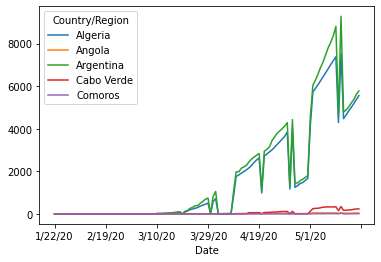

In [14]:
random=subsample.sample(5)
random = pd.melt(random, id_vars=["Country/Region"], 
                  var_name="Date", value_name="Infections").sort_values(['Country/Region', 'Date'])

random=random.pivot(index='Date', columns='Country/Region', values='Infections')

random.plot()

In [15]:
#random['Date']=pd.to_datetime(random['Date'],infer_datetime_format=True)#format="%m/%d/%Y", errors="coerce")
#random['days']=random.Date.diff()

<AxesSubplot:>

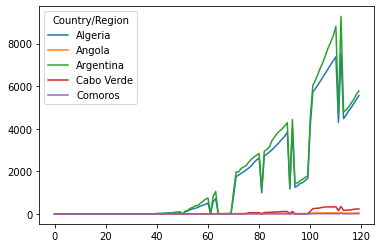

In [16]:
random=random.reset_index(level='Date',drop=True)
random.plot()

In [17]:
#pd.Series(delta.days for delta in (df2['Date'] - df2['Date'].shift()))


### Task 3 -- Set up a regression problem based on latitude, longitude, and date
Okay, so now we're going to see if the combination of latitude, longitude, and date can be used to accurately predict the number of infections in this dataset.

Start by creating two matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ holds the [latitude, longitude, date] data and $\mathbf{Y}$ holds the infection data. $\mathbf{X}$ will have shape $k \times 3$ and $\mathbf{Y}$ should have shape $k \times 1$. What is the value $k$, based on the size of the subsample from the full dataset that we've taken?


k = [50]

Create the matrices $\mathbf{X}$ and $\mathbf{Y}$ below:

In [18]:
df=pd.melt(data.iloc[:50, :121], id_vars=["Lat", 'Long', "Country/Region",'Province/State' ], var_name="Date", value_name="Infections")

df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df=df.sort_values(['Lat','Long', 'Date'])
df['days'] = df.groupby(['Lat', 'Long'])['Date'].diff()
df['days']= df['days'].dt.days
df.dropna(inplace=True)
df=df.drop(['Province/State','Country/Region'], axis=1)

In [19]:
X=df[['Lat', 'Long', 'days']]
Y=df[['Infections']]

In [20]:
X

,Lat,Long,days
63,-42.8821,147.3272,1.0
113,-42.8821,147.3272,1.0
163,-42.8821,147.3272,1.0
213,-42.8821,147.3272,1.0
263,-42.8821,147.3272,1.0
313,-42.8821,147.3272,1.0
363,-42.8821,147.3272,1.0
413,-42.8821,147.3272,1.0
463,-42.8821,147.3272,1.0
513,-42.8821,147.3272,1.0


Make a plot with 3 subplots, one for each of the independent variables (latitude, longitude, and date). Plot the data, displaying the independent variable on the x axis and the dependent variable (infections) on the y axis

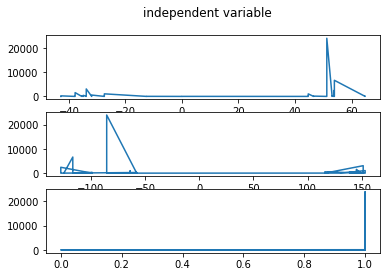

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('independent variable')
ax1.plot(X.Lat, Y)
ax2.plot(X.Long, Y)
ax3.plot(X.days, Y)

Discuss with your classmates in your breakout room what you notice about this data. Are there other ways you might try to visualize it to uncover some structure? Does this data look like a good candidate for fitting a linear model?

We should plot Lat and Long together.


Now split the data randomly into training and test sets. Make the training set 70% of the data and the test set the remaining 30%. You could do this manually, but we'll use the `train_test_split` function from the machine learning library [scikit-learn](https://scikit-learn.org/stable/).

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

^^ What is the `random_state` parameter doing? Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on `train_test_split` to find out. 

Note: This week is a good time to get very familiar with scikit-learn, if you haven't already. We will be using it a fair amount in this course and it's a great resource for applying machine learning models.

#### Random state is for reproducible output across multiple function calls.

### Task 4 -- Apply a polynomial regression of degree 3 to this data

You could do this manually using concepts we will cover next week, but for now let's use scikit-learn's `PolynomialFeatures` and `LinearRegression` modules.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print("New shape of test data=", np.shape(X_test_poly))

lin_regression = LinearRegression()
# Fit the model on train data only
lin_regression.fit(X_train_poly, Y_train)
print("The regression coefficients are: ", lin_regression.coef_)
print("The intercept is", lin_regression.intercept_)

New shape of test data= (662, 20)
The regression coefficients are:  [[ 0.00000000e+00  3.44940109e+02  1.10086214e+02  3.67104711e+01
  -3.96393781e+01 -2.80132774e+01  3.44940109e+02 -5.15434297e+00
   1.10086214e+02  3.67104711e+01  1.37286599e+00  1.44587284e+00
  -3.96393781e+01  5.26416014e-01 -2.80132774e+01  3.44940109e+02
   6.81197181e-02 -5.15434297e+00  1.10086214e+02  3.67104711e+01]]
The intercept is [6.54216869]


Now use the `.predict()` method of the `lin_regression` object above to generate predictions on the test data. Compare the predictions to `Y_test` using a plot.

In [24]:
Y_test_pred=lin_regression.predict(X_test_poly)

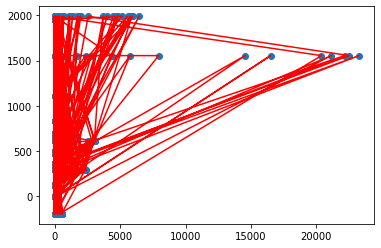

In [25]:
# Plot outputs

plt.scatter(Y_test, Y_test_pred)
plt.plot(Y_test, Y_test_pred, color='r')
plt.show()

Report the mean squared error of your predictions.

The mean squared error is

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_test_pred))

Mean squared error: 4695990.33
Coefficient of determination: 0.08


### Task 5 -- Run an experiment identifying the degree of the best-fitting polynomial regression

Your job is now to repeat the fitting and prediction steps above, but for polyomials of all orders from 1 to 20. For each fit, compute and save the mean squared error of the predictions.



In [27]:
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    print("\n")
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    results = {}
    results['rmse'] = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    return results

In [29]:

for d in range(1,21):
    create_polynomial_regression_model(d)




The model performance for the test set
-------------------------------------------
RMSE of test set is 2232.849682016931
R2 score of test set is 0.01832157072346441


The model performance for the test set
-------------------------------------------
RMSE of test set is 2204.455745928205
R2 score of test set is 0.043129767497899874


The model performance for the test set
-------------------------------------------
RMSE of test set is 2167.023380496085
R2 score of test set is 0.07534979861306845


The model performance for the test set
-------------------------------------------
RMSE of test set is 2108.721090482028
R2 score of test set is 0.12443466698854466


The model performance for the test set
-------------------------------------------
RMSE of test set is 1876.7437371682636
R2 score of test set is 0.3064780276915008


The model performance for the test set
-------------------------------------------
RMSE of test set is 1876.743737912507
R2 score of test set is 0.306478027141453

Report the polynomial order that resulted in the best fit. Does this number make sense? Do you think the regression has produced a good model for the data? Discuss with your classmates.

The best fit is 5